In [35]:
from skimage.io import imread ,imsave,imshow
from skimage import img_as_float
import numpy as np


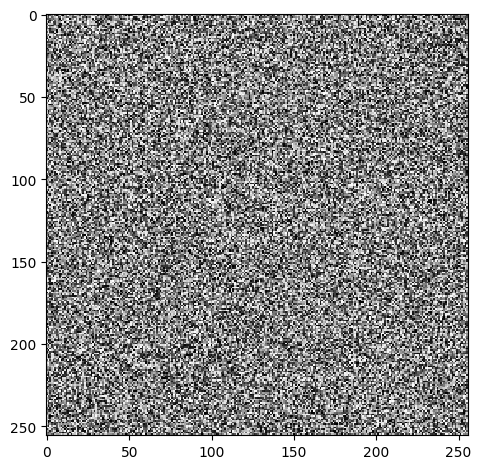

In [2]:
img=np.array(np.random.uniform(low=0.0, high=1.0, size=256*256)).reshape(256,256)
imshow(img)

Vector field observed by $G\cdot(x,y)$

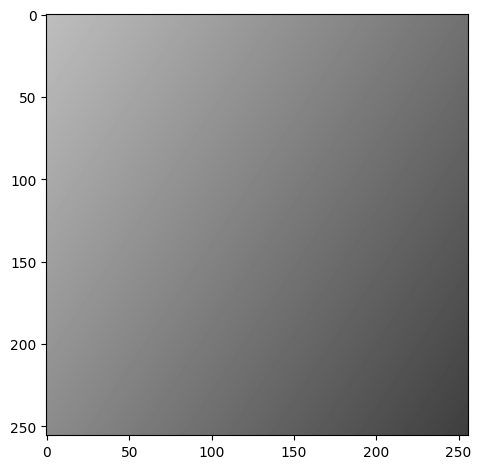

In [3]:
G=np.array([-0.3,-0.2]).reshape(2)
S=[]
for j in range(256):
    for i in range(256):
        S.append(G[0]*(i-125)/256+G[1]*(j-125)/256)
S_1=np.array(S)+1/2      
img_1=S_1.reshape(256,256)        
imshow(img_1)

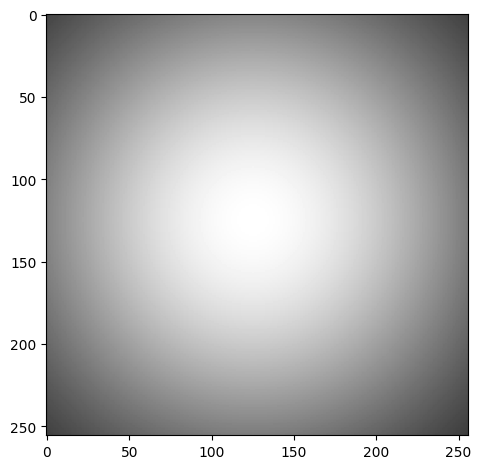

In [4]:
f=lambda x:1-(3-2*abs(x))*(x)**2

S=[]
for j in range(256):
    for i in range(256):
        S.append(f((i-125)/256)*f((j-125)/256))
S_2=np.array(S)  
img_2=S_2.reshape(256,256)        
imshow(img_2)   
   

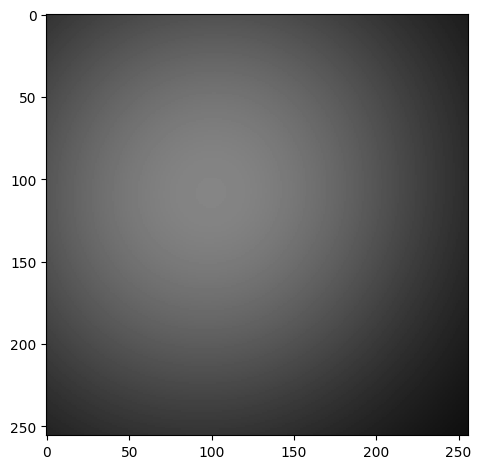

In [5]:
S_3=[]
for i in range(256):
    for j in range(256):
        S_3.append(img_1[i][j]*img_2[i][j])
img=np.array(S_3).reshape(256,256)        
imshow(img)  

for all grid

In [64]:
perlins_noise_f=lambda x:1-(3-2*abs(x))*(x)**2
def map_by_grad(n,grad):
    f=lambda x:1-(3-2*abs(x))*(x)**2
    S=[]
    for j in range(n):
      for i in range(n):
         S.append(grad[0]*(i-n/2)/n+grad[1]*(j-n/2)/n)
    return (np.array(S)+1/2).reshape(n,n) 
def map_by_ditribution(n,dist):
    S=[]
    for j in range(n):
      for i in range(n):
         S.append(dist((i-n/2)/n)*dist((j-n)/n))
    return np.array(S).reshape(n,n) 


def n_part_of_noise(n,grad,dist):
    S=[]
    for j in range(n):
      for i in range(n):
         S.append(dist((i-n/2)/n)*dist((j-n)/n)*(1/2+ grad[0]*(i-n/2)/n+grad[1]*(j-n/2)/n))
    return np.array(S).reshape(n,n) 

def  mask_for_pic(N,M,n):       
 Gr=np.random.uniform(low=-0.5, high=0.5, size=N*M*2).reshape(N,M,2)
 blocks=[]
 for i in range(0,int(N/n)):
     block=[]
     for j in range(0,int(M/n)):
        block.append(n_part_of_noise(n,Gr[i][j],perlins_noise_f))
     blocks.append(np.concatenate(block,axis=1))
 return np.concatenate(blocks,axis=0)
 


(976, 976)

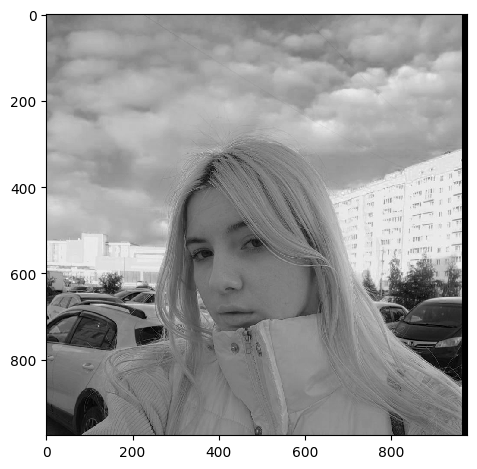

In [71]:
img=imread("photo1717507475.jpeg")
img_1=np.concatenate([img_as_float(img)[:,:,0],np.array(1280*12*[0.0]).reshape(1280,12)],axis=1)[:976,:]
imshow(img_1)
img_1.shape

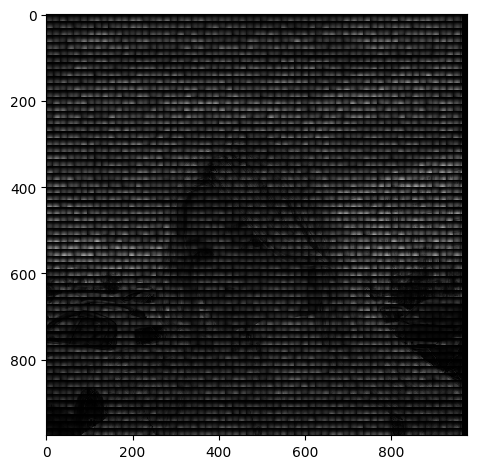

In [72]:
mask=mask_for_pic(976,976,16)
new_img=np.zeros((976,976))
for i in range(976):
    for j in range(976):
        new_img[i][j]=mask[i][j]*img_1[i][j]
imshow(new_img)        
        



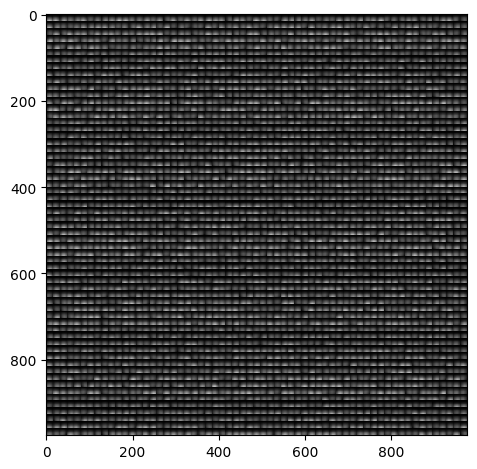

In [73]:
imshow(mask_for_pic(976,976,16))

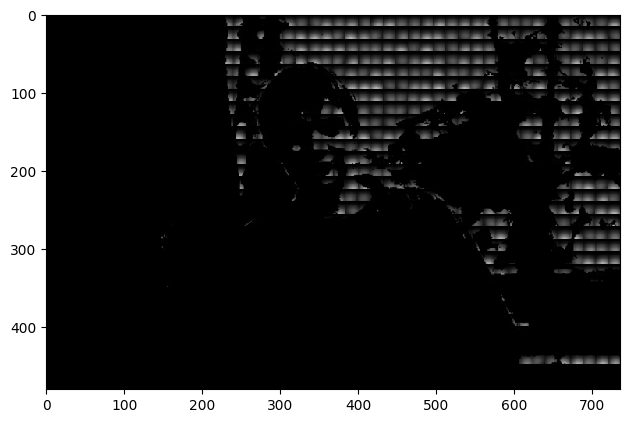

In [79]:
slave=img_as_float(imread("skave.jpg")[:480,:736,0])
mask_2=mask_for_pic(480,736,16)
new_img=np.zeros((480,736))
for i in range(480):
    for j in range(736):
        new_img[i][j]=mask_2[i][j]*slave[i][j]
imshow(new_img)   

In [ ]:
[4,5,5,5,4,]